In [1]:
import torch
import torch.nn as nn
import random
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\chand\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
words = open("names.txt", "r").read().splitlines()

In [3]:
chars = sorted(list(set("".join(words))))

chartoint = {c:i+1 for i,c in enumerate(chars)}
inttochar = {i+1:c for i,c in enumerate(chars)}

chartoint["."] = 0
inttochar[0] = "."
block_size = 4


In [4]:
def build_dataset(words):
    x, y = [], []
    for i in words:
        context = [0] * block_size
        for ch in i + ".":
            ix = chartoint[ch]
            x.append(context)
            y.append(ix)
            # print("".join(inttochar[i] for i in context), "---->", inttochar[ix])
            context = context[1:] + [ix]
    X = torch.tensor(x)
    Y = torch.tensor(y)
    return X, Y

c = torch.randn([27, 10])
w1 = torch.randn([40, 200])
b1 = torch.randn([200])
w2 = torch.randn(200, 27)
b2 = torch.randn(27)

parameters = [w1, b1, w2, b2, c]
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:]) 

for p in parameters:
    p.requires_grad = True

stepi = []
lossi = []

In [8]:
print(Xtr.dtype)

for i in range(30000):
    ix = torch.randint(0, Xtr.shape[0], (1844,))
    print(c.shape, Xtr[ix].shape)
    result = c[Xtr[ix]]
    hidden = torch.tanh(result.view(-1, 40) @ w1 + b1)

    logits = hidden @ w2 + b2
    loss = nn.functional.cross_entropy(logits, Ytr[ix])

    # backwards
    for parameter in parameters:
        parameter.grad = None
    loss.backward()

    for p in parameters:
        p.data += -0.01 * p.grad

    stepi.append(i)
    lossi.append(loss.item())
print(loss.item())


torch.int64
torch.Size([27, 10]) torch.Size([1844, 4])
torch.Size([27, 10]) torch.Size([1844, 4])
torch.Size([27, 10]) torch.Size([1844, 4])
torch.Size([27, 10]) torch.Size([1844, 4])
torch.Size([27, 10]) torch.Size([1844, 4])
torch.Size([27, 10]) torch.Size([1844, 4])


KeyboardInterrupt: 

In [ ]:
plt.plot(stepi, lossi)

In [295]:

result = c[Xdev]
hidden = torch.tanh(result.view(-1, 40) @ w1 + b1)

logits = hidden @ w2 + b2
loss = nn.functional.cross_entropy(logits, Ydev)
loss

tensor(2.1694, grad_fn=<NllLossBackward0>)

In [296]:
result = c[Xtest]
hidden = torch.tanh(result.view(-1, 40) @ w1 + b1)

logits = hidden @ w2 + b2
loss = nn.functional.cross_entropy(logits, Ytest)
loss

tensor(2.1658, grad_fn=<NllLossBackward0>)

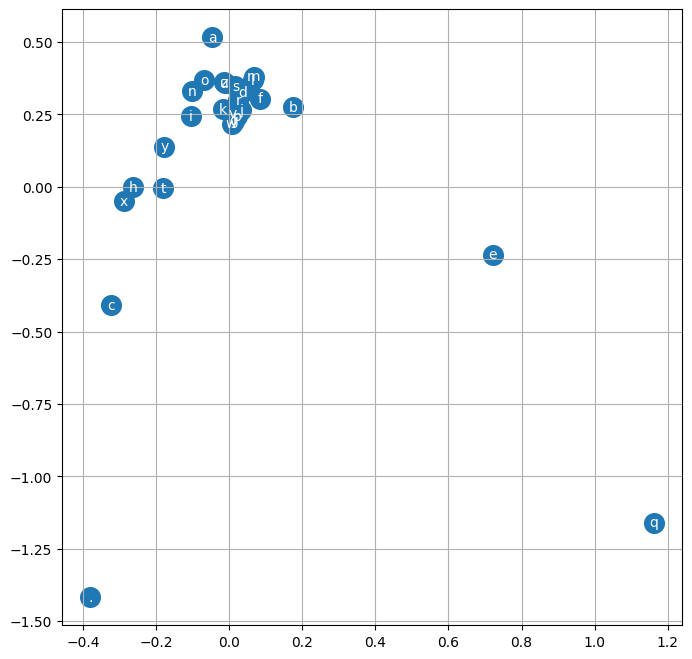

In [297]:
plt.figure(figsize=(8,8))
plt.scatter(c[:,0].data,c[:,1].data, s=200)

for i in range(c.shape[0]):
    plt.text(c[i,0].item(), c[i,1].item(), inttochar[i], ha="center", va="center", color="white")
plt.grid("minor")

In [ ]:
for i in range(200):

    context = [0] * block_size

    out = []

    while True:

        emb = c[torch.tensor([context])]
        h = torch.tanh(emb.view(-1, 40) @ w1 + b1)
        logits = h @ w2 + b2
        probs = nn.functional.softmax(logits, dim=1)
        ix = torch.multinomial(probs, 1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    print("".join(inttochar[i] for i in out))